In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import six

sns.set(style='ticks', context='talk', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})


import bonvoyage

%load_ext autoreload
%autoreload 2

# Figures in the notebook
%matplotlib inline

# Set random seed
np.random.seed(sum(map(ord, 'bonvoyage')))


# Define folder to save figures
folder = 'figures/anchor/sfig_10'
!mkdir -p $folder


/home/obotvinnik/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:810: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/obotvinnik/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())


## Show seed data dataset

In [2]:
from anchor.infotheory import bin_range_strings

In [3]:
bin_names = bin_range_strings(bonvoyage.Waypoints.bins)
bin_names

['0.0-0.1',
 '0.1-0.2',
 '0.2-0.3',
 '0.3-0.4',
 '0.4-0.5',
 '0.5-0.6',
 '0.6-0.7',
 '0.7-0.8',
 '0.8-0.9',
 '0.9-1.0']

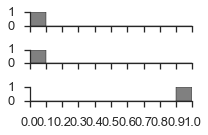

In [4]:
seed_data = bonvoyage.Waypoints.seed_data

fig, axes = plt.subplots(figsize=(3, 2), nrows=3, sharex=True, sharey=True)

width = 1

for (i, row), ax in zip(seed_data.iterrows(), axes):
    ax.bar(row.index, row.values, width=width, color='grey')
sns.despine()
xticks = np.arange(row.shape[0]+1)
ax.set(yticks=(0, 1), xticks=xticks, xticklabels=xticks/10.)
fig.tight_layout()
fig.savefig('{}/bonvoyage_seed_data.pdf'.format(folder))

## Make "Maybe Everything" test dataset

In [5]:
size = 100

perfectly1 = np.ones(size).reshape(size, 1)
perfectly0 = np.zeros(size).reshape(size, 1)
perfectly_middle = 0.5*np.ones(size).reshape(size, 1)
maybe_middles_0 = np.vstack([np.concatenate([np.zeros(i), np.ones(size-i)*0.5]) for i in range(1, size)]).T
maybe_middles_1 = np.vstack([np.concatenate([np.ones(i), np.ones(size-i)*0.5]) for i in range(1, size)]).T
maybe_bimodals = np.vstack([np.concatenate([np.zeros(i), np.ones(size-i)]) for i in range(1, size)]).T

columns = ['perfect_middle'.format(str(i).zfill(2)) for i in range(perfectly_middle.shape[1])] \
    + ['middle0_{}'.format(str(i).zfill(2)) for i in range(maybe_middles_0.shape[1])] \
    + ['middle1_{}'.format(str(i).zfill(2)) for i in range(maybe_middles_1.shape[1])] \
    + ['bimodal_{}'.format(str(i).zfill(2)) for i in range(maybe_bimodals.shape[1])] \
    + ['perfect_included', 'perfect_excluded']

data = np.hstack([perfectly_middle, maybe_middles_0, maybe_middles_1, maybe_bimodals, perfectly1, perfectly0])
maybe_everything = pd.DataFrame(data, columns=columns)
six.print_(maybe_everything.shape)
maybe_everything.head()

(100, 300)


,perfect_middle,middle0_00,middle0_01,middle0_02,middle0_03,middle0_04,middle0_05,middle0_06,middle0_07,middle0_08,...,bimodal_91,bimodal_92,bimodal_93,bimodal_94,bimodal_95,bimodal_96,bimodal_97,bimodal_98,perfect_included,perfect_excluded
0,0.5,0.0,0.0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.5,0.5,0.0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.5,0.5,0.5,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.5,0.5,0.5,0.5,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0.5,0.5,0.5,0.5,0.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [6]:
from anchor.simulate import add_noise

In [7]:
maybe_everything_noisy = add_noise(maybe_everything, iteration_per_noise=10, 
                                   noise_percentages=np.arange(0, 101, 5), plot=False)
six.print_(maybe_everything_noisy.shape)
maybe_everything_noisy.head()

(100, 60300)


,perfect_middle_noise0_iter0,middle0_00_noise0_iter0,middle0_01_noise0_iter0,middle0_02_noise0_iter0,middle0_03_noise0_iter0,middle0_04_noise0_iter0,middle0_05_noise0_iter0,middle0_06_noise0_iter0,middle0_07_noise0_iter0,middle0_08_noise0_iter0,...,bimodal_91_noise100_iter9,bimodal_92_noise100_iter9,bimodal_93_noise100_iter9,bimodal_94_noise100_iter9,bimodal_95_noise100_iter9,bimodal_96_noise100_iter9,bimodal_97_noise100_iter9,bimodal_98_noise100_iter9,perfect_included_noise100_iter9,perfect_excluded_noise100_iter9
0,0.5,0.0,0.0,0.0,0.0,0,0,0,0,0,...,0.756519,0.123426,0.156010,0.397855,0.689124,0.822287,0.059486,0.032697,0.175249,0.673825
1,0.5,0.5,0.0,0.0,0.0,0,0,0,0,0,...,0.416175,0.688381,0.876422,0.153659,0.406306,0.714781,0.452631,0.890333,0.495503,0.194227
2,0.5,0.5,0.5,0.0,0.0,0,0,0,0,0,...,0.400526,0.012098,0.391870,0.681438,0.714112,0.587022,0.997617,0.179406,0.094149,0.551203
3,0.5,0.5,0.5,0.5,0.0,0,0,0,0,0,...,0.153326,0.399814,0.843777,0.106176,0.125045,0.765685,0.582473,0.797105,0.886579,0.486906
4,0.5,0.5,0.5,0.5,0.5,0,0,0,0,0,...,0.569110,0.288521,0.049904,0.312614,0.213312,0.666463,0.798311,0.552320,0.399732,0.078480


### Save the data

In [8]:
maybe_everything_noisy.to_csv('data.csv')

### Plot a subset of the data with violinplots

In [9]:
tidy = maybe_everything_noisy.unstack().reset_index()
tidy = tidy.rename(columns={'level_0':'Feature ID', 'level_1': "Sample ID", 0:'$\Psi$'})
six.print_(tidy.shape)
tidy.head()

(6030000, 3)


,Feature ID,Sample ID,$\Psi$
0,perfect_middle_noise0_iter0,0,0.5
1,perfect_middle_noise0_iter0,1,0.5
2,perfect_middle_noise0_iter0,2,0.5
3,perfect_middle_noise0_iter0,3,0.5
4,perfect_middle_noise0_iter0,4,0.5


In [ ]:
tidy['Iteration'] = tidy['Feature ID'].str.extract('iter(\d+)').astype(int)
tidy['% Noise'] = tidy['Feature ID'].str.extract('noise(\d+)').astype(int)
tidy.head()

,Feature ID,Sample ID,$\Psi$,Iteration,% Noise
0,perfect_middle_noise0_iter0,0,0.5,0,0
1,perfect_middle_noise0_iter0,1,0.5,0,0
2,perfect_middle_noise0_iter0,2,0.5,0,0
3,perfect_middle_noise0_iter0,3,0.5,0,0
4,perfect_middle_noise0_iter0,4,0.5,0,0


In [ ]:
%%time
split_id = tidy['Feature ID'].str.split('_').apply(pd.Series)
tidy = pd.concat([tidy, split_id], axis=1)
tidy.head()

In [ ]:
tidy.to_csv('metadata.csv', index=False)

In [ ]:
tidy.head()

In [ ]:
tidy.columns

In [ ]:
noise_levels = tidy['% Noise'].isin([0, 25, 50, 75])

perfects = tidy['Feature ID'].str.contains('perfect')
middles = tidy['Feature ID'].str.startswith('middle') & tidy[1].isin(['25', '50', '75'])
bimodals = tidy['Feature ID'].str.startswith('bimodal') & tidy[1].isin(['25', '50', '75'])

row_subsets = perfects, bimodals, middles

dfs = []

for rows in row_subsets:
    df = tidy.loc[rows & noise_levels]
    dfs.append(df)
tidy_subset = pd.concat(dfs, ignore_index=True)
six.print_(tidy_subset.shape)
tidy_subset.head()

In [ ]:
tidy_subset.groupby([0, 1, '% Noise']).size()

In [ ]:
from anchor import MODALITY_TO_COLOR

In [ ]:
figure_folder = 'pdf'
! mkdir $figure_folder

In [ ]:
sns.set(context='paper', style='ticks')

In [ ]:
for group, df in tidy_subset.groupby(0):
    palette = None
    six.print_(group)
    
    if group == 'bimodal':
        palette = "RdBu"
    elif group == 'middle0':
        palette = 'YlGnBu'
    elif group == 'middle1':
        palette = 'YlOrRd'
    elif group == 'perfect':
        palette = [MODALITY_TO_COLOR[m] for m in df[1].unique()]
    
    g = sns.factorplot(x=1, y='$\Psi$', col='% Noise', data=df, aspect=1, size=1.5,
                   kind='violin', bw=0.2, inner=None, scale='width', sharex=False, palette=palette)
    g.set(ylim=(0, 1), yticks=(0, 0.5, 1), xlabel='')
    if group == 'perfect':
        for ax in g.axes.flat:
            plt.setp(ax.get_xticklabels(), rotation=30)
    g.savefig('{}/data_{}.pdf'.format(figure_folder, group))

## Transform to waypoints

In [ ]:
# Initialize the waypoints transformer
ws = bonvoyage.Waypoints()

waypoints = ws.fit_transform(maybe_everything_noisy)
six.print_(waypoints.shape)
waypoints.head()

In [ ]:
waypoints.to_csv('waypoints.csv')